# Example 6 : Manifold Clustering with t-SNE

While there is an implementation of t-SNE inside of scikit-learn, we will be using a better-optimized implementation using the package [openTSNE](https://opentsne.readthedocs.io/en/stable/index.html). First we will take a look at using openTSNE by performing an embedding using mostly default options on some artificial data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200 # bigger figures

# Use more REVTEX-esque fonts
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIXGeneral"
mpl.rcParams["mathtext.fontset"] = "stix"

# Simple Case of Three Normal Distributions



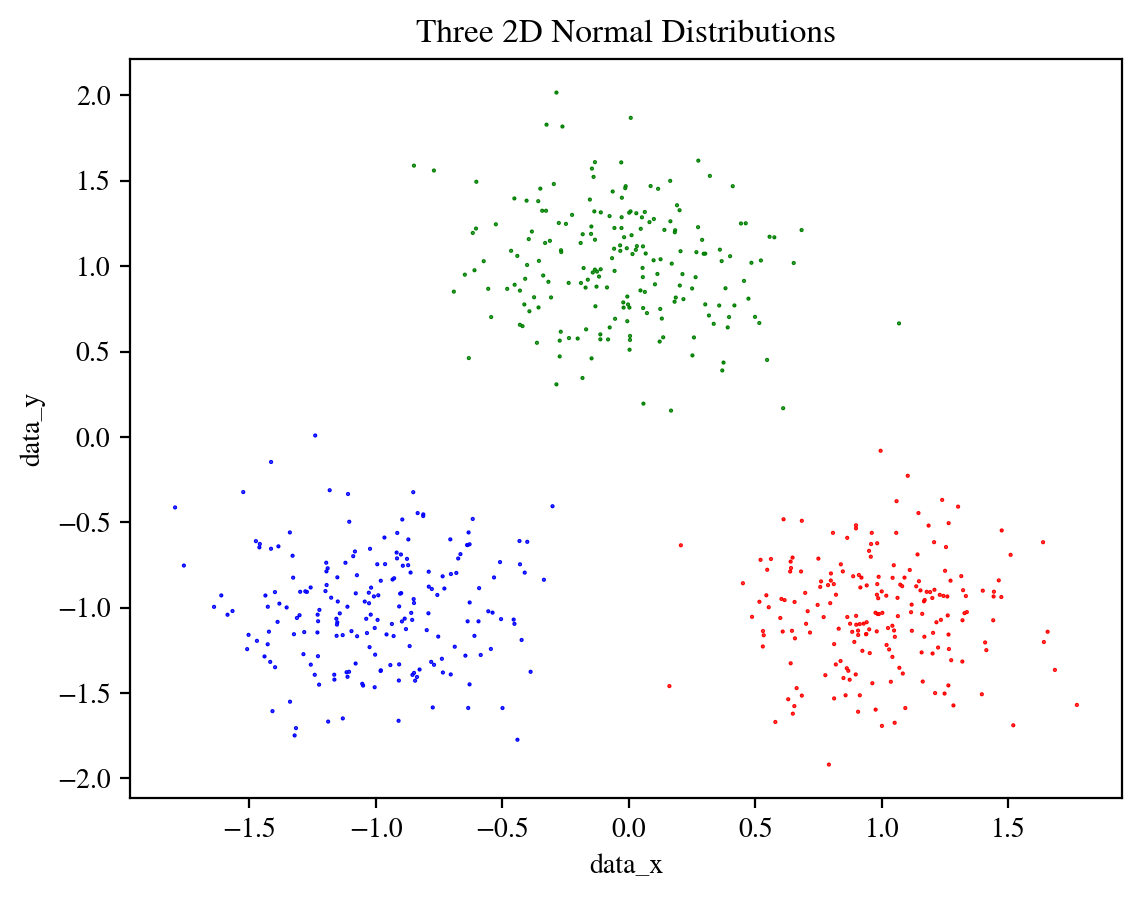

In [16]:
rng = np.random.default_rng(1729)

test_r = rng.multivariate_normal([1.0,-1.0], [[0.1,0],[0,0.1]], size=200)
test_b = rng.multivariate_normal([-1.0,-1.0], [[0.1,0],[0,0.1]], size=200)
test_g = rng.multivariate_normal([0.0,1.0], [[0.1,0],[0,0.1]], size=200)
col_tag = np.concatenate((np.tile('r', 200),np.tile('b', 200),np.tile('g', 200))) 
test_data = np.concatenate((test_r,test_b,test_g))

plt.title('Three 2D Normal Distributions')
plt.scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
plt.xlabel('data_x')
plt.ylabel('data_y')
plt.show()

Then we will run the fit method on our data set; it should be noted that openTSNE expects data to be in the form of a numpy array. If our data was in a dataframe, one can use the inbuilt pandas function to convert to a numpy array.
```python
data_np = data_dataframe.to_numpy()
```

Let's use the default settings of the openTSNE embedding and see how our test set changes. One option we will use is giving the embedding a fixed random seed, which means everytime you run this notebook the embeddings will be the same. This first calculation will take a few seconds (as you will see from the output of the cell magic %%time command) however as you will see in the more interesting examples the more data points in general the longer t-SNE will take.

In [3]:
from openTSNE import TSNE

tsne = TSNE(random_state=42) # Use all the defaults of the regular embedding

In [4]:
%%time 
tsne_embed = tsne.fit(test_data)

CPU times: total: 11.4 s
Wall time: 12.2 s


The embedding will return a numpy array that we can plot in matplotlib. We will plot the first t-SNE component on the x-axis and the second t-SNE  component on the y-axis. Using the col_tag array we can compare what the t-SNE did to the points of each of the three distributions.

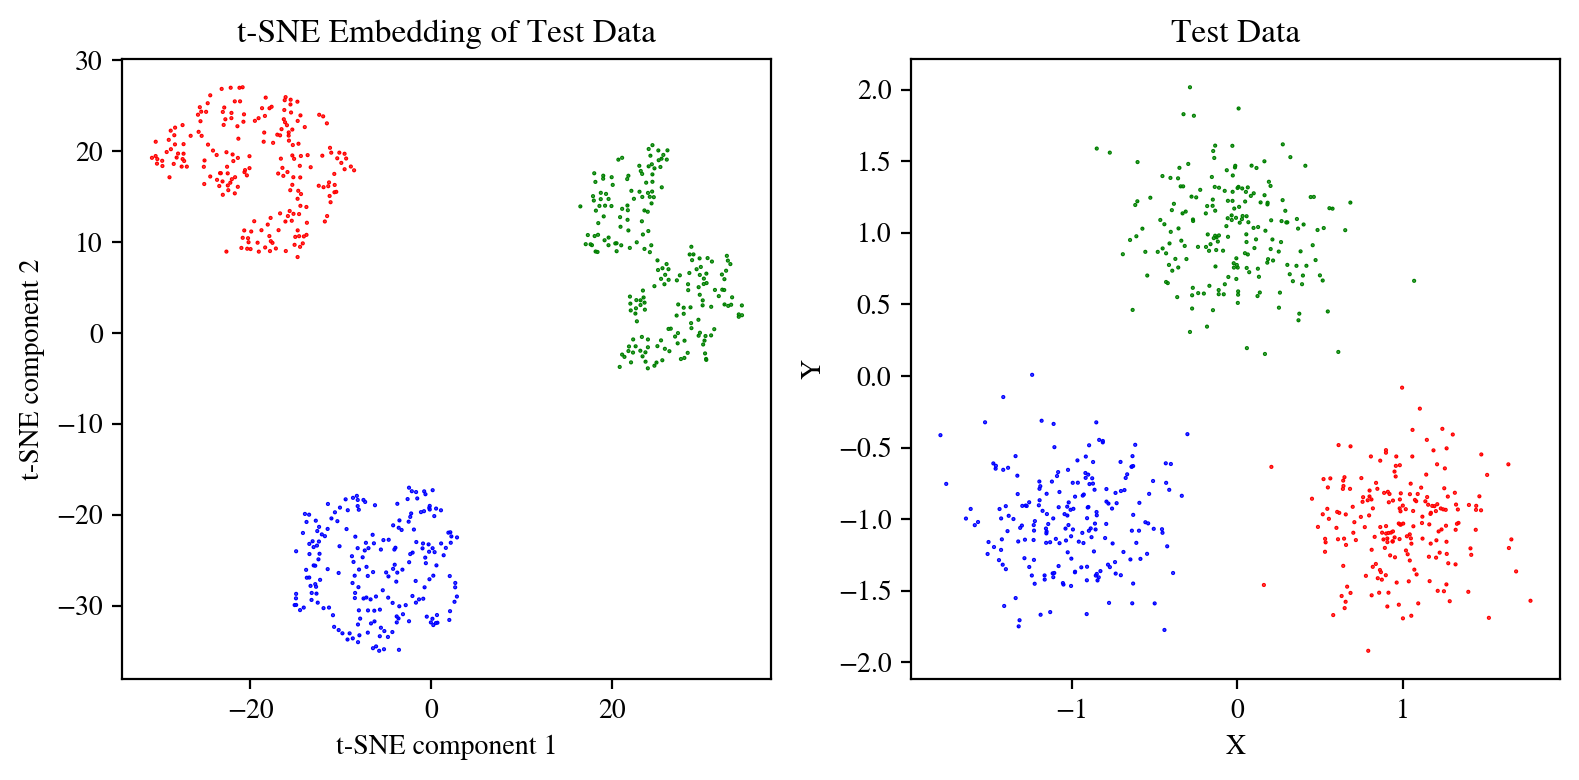

In [5]:
fig, ax = plt.subplots(1,2)
#
ax[0].set_title('t-SNE Embedding of Test Data')
ax[0].scatter(tsne_embed[:,0], tsne_embed[:,1], marker='.', s=1, color=col_tag)
ax[0].set_xlabel('t-SNE component 1')
ax[0].set_ylabel('t-SNE component 2')
#
ax[1].set_title('Test Data')
ax[1].scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

fig.set_size_inches(8,4)
plt.tight_layout()
plt.show()

Not surprisingly, we started with three separate normal distributions that had no overlap, and the t-SNE embedding has returned three clusters, each containing a single color. Something that is interesting with the t-SNE result is it looks like the mean distance between the clusters has increased. We can add a little more complexity by making our 2D distributions multivariate.

# The Slightly More Interesting Case of Three Multivariate Normal Distributions



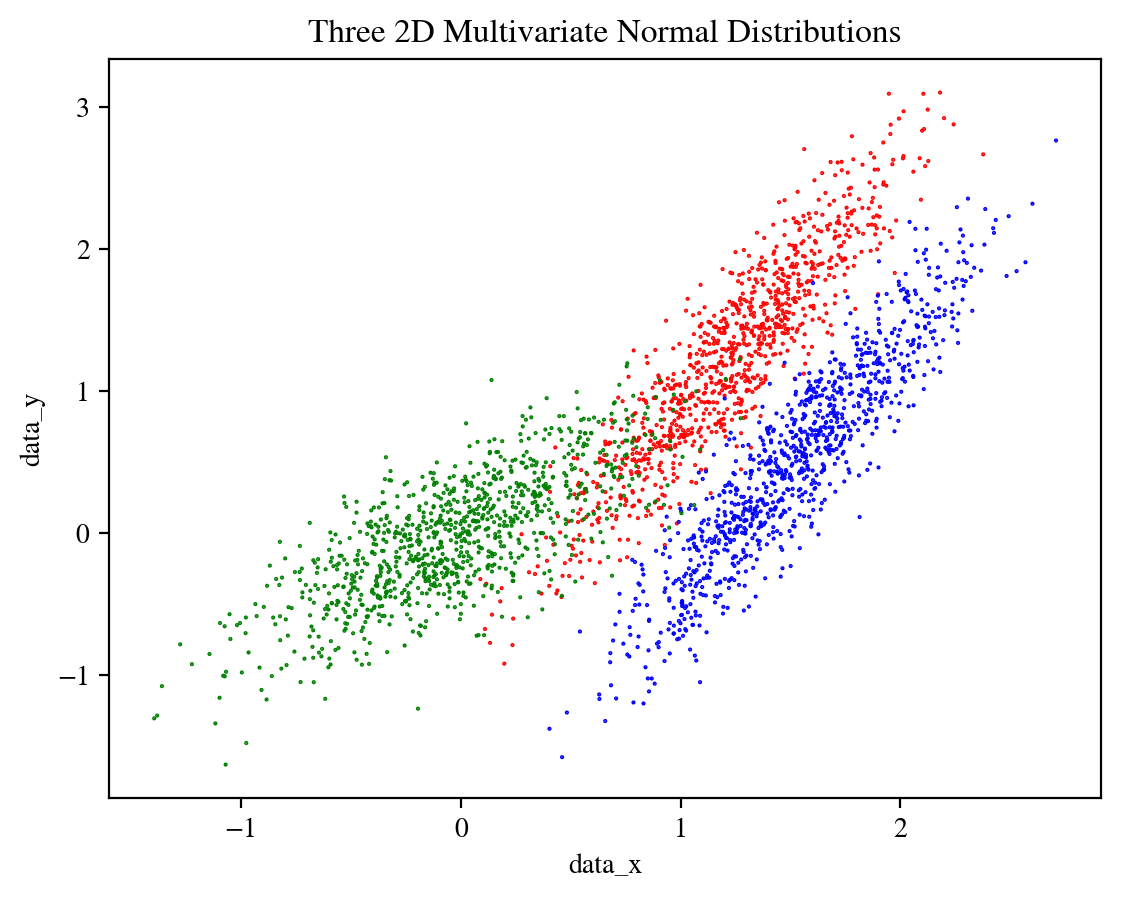

In [17]:
rng = np.random.default_rng()

test_r = rng.multivariate_normal([1.2,1.2], [[0.15,0.25],[0.25,0.5]], size=1000)
test_b = rng.multivariate_normal([1.5,0.5], [[0.15,0.25],[0.25,0.5]], size=1000)
test_g = rng.multivariate_normal([0.0,0.0], [[0.2,0.15],[0.15,0.2]], size=1000)
col_tag = np.concatenate((np.tile('r', 1000),np.tile('b', 1000),np.tile('g', 1000))) 
test_data = np.concatenate((test_r,test_b,test_g))

plt.title('Three 2D Multivariate Normal Distributions')
plt.scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
plt.xlabel('data_x')
plt.ylabel('data_y')
plt.show()

In [7]:
%%time 
tsne_embed = tsne.fit(test_data)

CPU times: total: 1min 30s
Wall time: 1min 36s


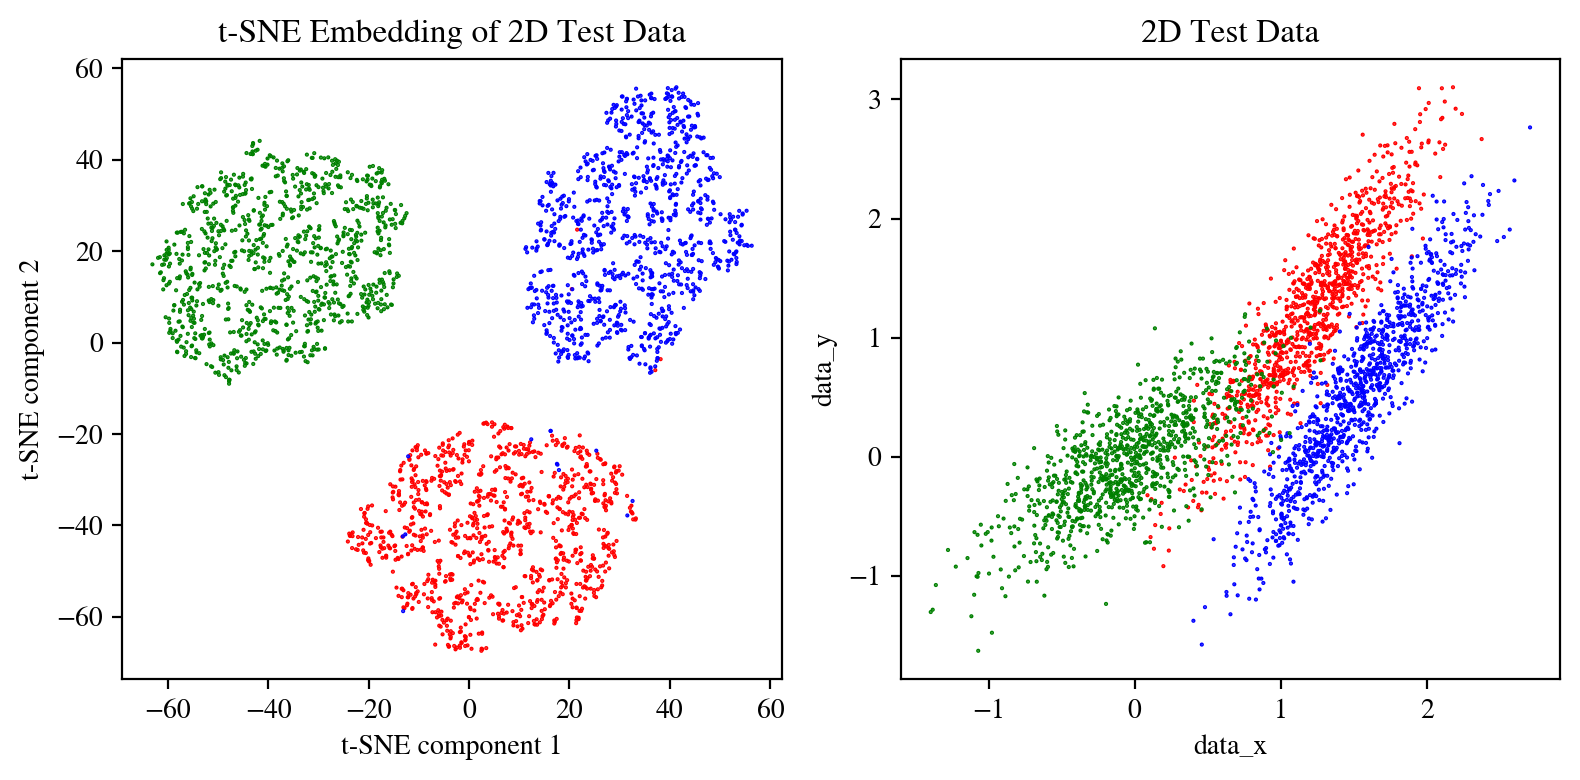

In [20]:
fig, ax = plt.subplots(1,2)
#
ax[0].set_title('t-SNE Embedding of 2D Test Data')
ax[0].scatter(tsne_embed[:,0], tsne_embed[:,1], marker='.', s=1, color=col_tag)
ax[0].set_xlabel('t-SNE component 1')
ax[0].set_ylabel('t-SNE component 2')
#
ax[1].set_title('2D Test Data')
ax[1].scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
ax[1].set_xlabel('data_x')
ax[1].set_ylabel('data_y')

fig.set_size_inches(8,4)
plt.tight_layout()
plt.show()

# Moving Beyond 2D - Extending our Example to a 5D Datasets

In [9]:
# Alpha
alpha_r = rng.normal(5.0,1.0,1000)
alpha_b = rng.normal(5.2,0.9,1000)
alpha_g = rng.normal(8.0,1.0,1000)
# Beta
beta_r = rng.normal(3.0,1.0,1000)
beta_b = rng.normal(7.0,1.5,1000)
beta_g = rng.normal(2.8,0.8,1000)
# Gamma
gamma_r = rng.normal(1.0,0.5,1000)
gamma_b = rng.normal(3.0,0.6,1000)
gamma_g = rng.normal(5.0,0.4,1000)
#
alpha_data = np.concatenate((alpha_r,alpha_b,alpha_g))
beta_data = np.concatenate((beta_r,beta_b,beta_g))
gamma_data = np.concatenate((gamma_r,gamma_b,gamma_g))

In [10]:
test_data_dict = {'data_x':test_data[:,0], 'data_y':test_data[:,1], 'alpha':alpha_data, 'beta':beta_data, 'gamma':gamma_data}
df_test = pd.DataFrame(test_data_dict)
np_test = df_test.to_numpy()

In [11]:
from matplotlib.colors import LogNorm

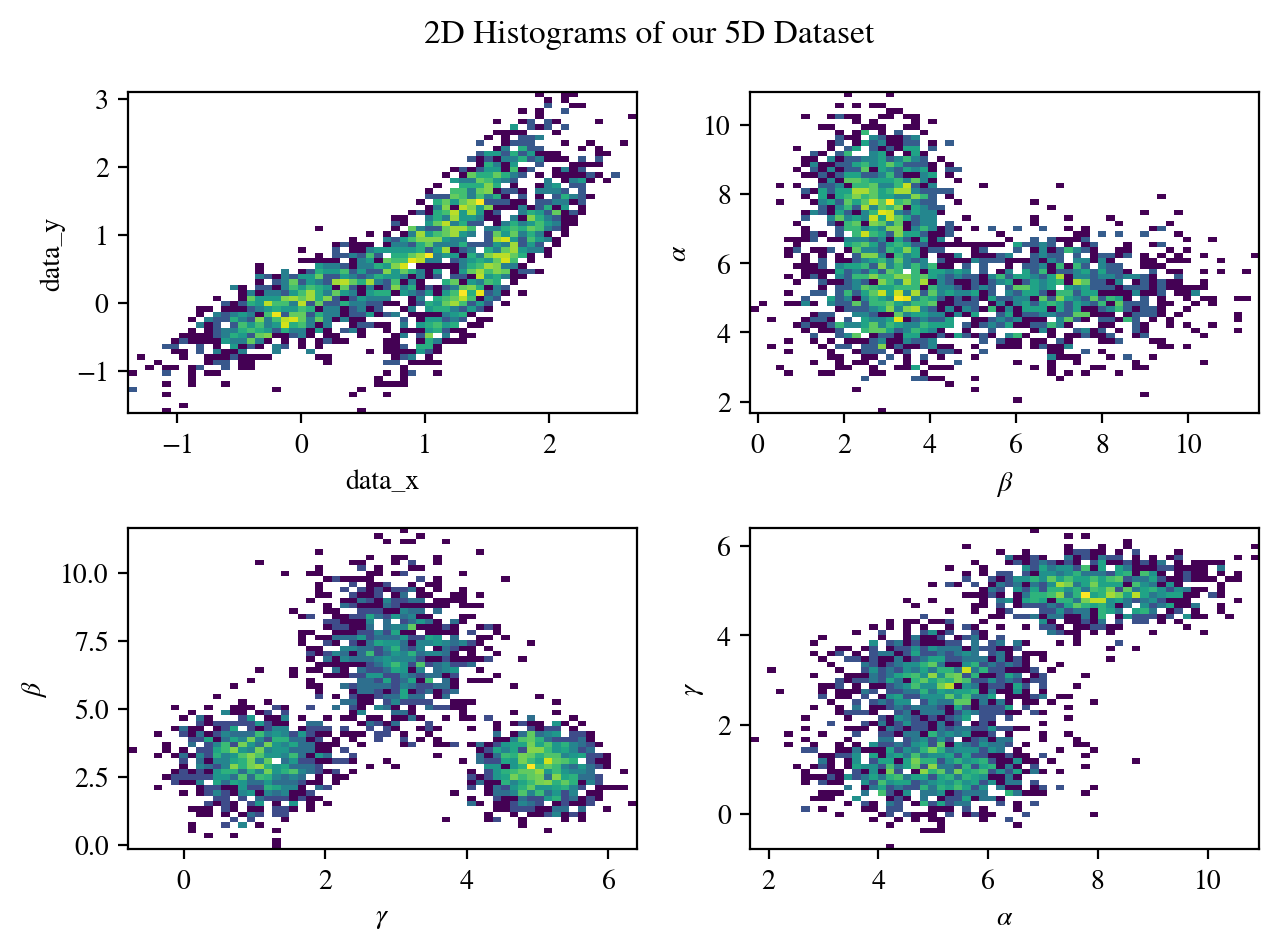

In [18]:
fig, ax = plt.subplots(2,2)
fig.suptitle('2D Histograms of our 5D Dataset')

ax[0,0].hist2d(test_data[:,0],test_data[:,1], bins=60, norm=LogNorm())
ax[0,0].set_xlabel('data_x')
ax[0,0].set_ylabel('data_y')
#
ax[0,1].hist2d(beta_data, alpha_data, bins=60, norm=LogNorm())
ax[0,1].set_xlabel(r'$\beta$')
ax[0,1].set_ylabel(r'$\alpha$')
#
ax[1,0].hist2d(gamma_data, beta_data, bins=60, norm=LogNorm())
ax[1,0].set_xlabel(r'$\gamma$')
ax[1,0].set_ylabel(r'$\beta$')
#
ax[1,1].hist2d(alpha_data, gamma_data, bins=60, norm=LogNorm())
ax[1,1].set_xlabel(r'$\alpha$')
ax[1,1].set_ylabel(r'$\gamma$')

plt.tight_layout()
plt.show()

In [13]:
%%time 
tsne_embed = tsne.fit(np_test)

CPU times: total: 1min 26s
Wall time: 1min 32s


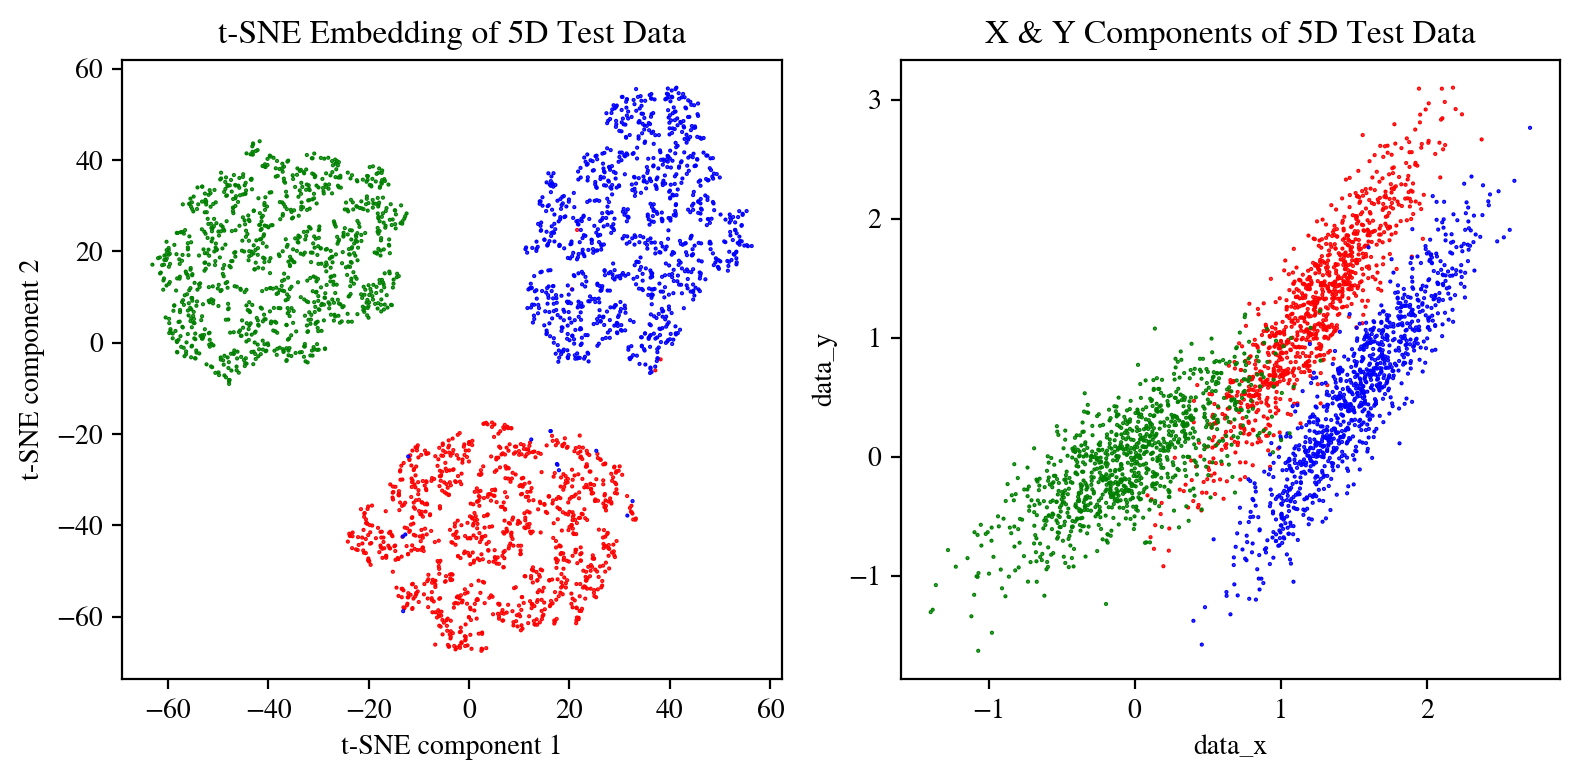

In [21]:
fig, ax = plt.subplots(1,2)
#
ax[0].set_title('t-SNE Embedding of 5D Test Data')
ax[0].scatter(tsne_embed[:,0], tsne_embed[:,1], marker='.', s=1, color=col_tag)
ax[0].set_xlabel('t-SNE component 1')
ax[0].set_ylabel('t-SNE component 2')
#
ax[1].set_title('X & Y Components of 5D Test Data')
ax[1].scatter(test_data[:,0], test_data[:,1], marker='.', s=1, color=col_tag)
ax[1].set_xlabel('data_x')
ax[1].set_ylabel('data_y')

fig.set_size_inches(8,4)
plt.tight_layout()
plt.show()